# Búsqueda de parametros ideales para KNN y KNN+PCA.

#### En este notebook buscamos cual es la cantidad k de vecinos ideal para el algoritmo de KNN. Luego buscamos cual es el par ideal de k vecinos y alpha componentes principales para el algoritmo de KNN+PCA.

## Compilando el módulo desde C++

#### Compilamos el modulo desde C++. En CMakeList.txt está seteado que se corra con OpenMP para paralelizar operaciones

In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: no se puede crear el directorio «build»: El archivo ya existe
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Found libomp without any special flags
-- pybind11 v2.6.3 dev1
-- Found PythonInterp: /home/laureano/Documentos/met2021/grupal/metnum-1c2021-tp2/tp2/bin/python (found vers

In [16]:
# Importamos el tp. Importamos funciones.
import metnum
import funciones
import sklearn as sk
from sklearn import metrics
#Armamos el dataset
X,Y,X_test,Y_test = funciones.construir_dataset()
X_trains,Y_trains,X_vals,Y_vals = funciones.get_KFold_sets(X,Y)

## Buscamos obtener el par k, aplha que maximice la performance de este clasificador. Luego, con los parametros obtenidos, lo compararemos con el clasificador sin pesos.

### Comenzamos calculando el accuracy para los intervalos [1,15] de k y [20,35] de alpha. Esperamos que los parametros ideales de este clasificador sean cercanos a los del knn clasico.

100%|██████████| 15/15 [28:16<00:00, 113.11s/it]


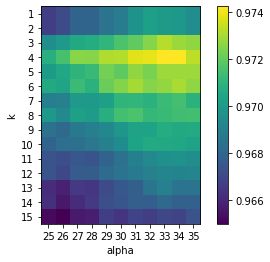

In [7]:
tupla, tiempo = funciones.encontrarParOptimo(X_trains,Y_trains,X_vals,Y_vals,conPeso=True,heatmap=True)
paramPesos = (tupla[0],tupla[1])
paramKNN = (3,34) #le tire lo que me acuerdo pero aca va el valor calculado en parametrosIdeales

### Ahora compararemos su desempeño y calcularemos la kappa de cohen

In [20]:
y_predPesos = funciones.Test(paramPesos,X, Y, X_test, conPeso=True)
y_predKNN = funciones.Test(paramKNN, X, Y, X_test, conPeso= False)

print(sk.metrics.accuracy_score(Y_test, y_predPesos))
print(sk.metrics.accuracy_score(Y_test, y_predKNN))
cohen = sk.metrics.cohen_kappa_score(y_predPesos,y_predKNN)

0.9770238095238095
0.9758333333333333


In [18]:
print(cohen)

0.9913987304242547
